# Visualising data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from astropy.time import Time
from datetime import datetime
from sklearn.metrics import accuracy_score

In [2]:
icouk_data_file = '../Data/icouk_sighting_data_with_params.csv'
icop_data_file = '../Data/icop_ahmed_2020_sighting_data_with_params.csv'
alrefay_data_file = '../Data/alrefay_2018_sighting_data_with_params.csv'
allawi_data_file = '../Data/schaefer_odeh_allawi_2022_sighting_data_with_params.csv'

icouk_data = pd.read_csv(icouk_data_file)
icop_data = pd.read_csv(icop_data_file)
alrefay_data = pd.read_csv(alrefay_data_file)
allawi_data = pd.read_csv(allawi_data_file)

sources = [icouk_data,icop_data,alrefay_data,allawi_data]
source_names = ["ICOUK", "ICOP", "Alrefay", "Schaefer/Odeh"]
colours = ["red", "green", "yellow", "blue"]
data = pd.concat(sources)

print(data.shape[0])
#data = data[data["Cloud Level"] == 0]
data.head(5)

3626


,Unnamed: 0,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,...,W,W',q,q',Cloud Level,Seen,Method,Methods,Visibility,Source
0,0,0,2.457309e+06,53.95763,-1.08271,0.722,2.457309e+06,2.457309e+06,27.05935,1.51838,...,0.13433,0.13438,-0.77507,-0.77503,1.0,Not_seen,Not_seen,Not_seen,0.0,ICOUK
1,1,1,2.457339e+06,53.95763,-1.08271,1.687,2.457339e+06,2.457339e+06,57.80819,3.36486,...,0.27535,0.27561,-0.34666,-0.34650,0.5,Not_seen,Not_seen,Not_seen,0.0,ICOUK
2,2,2,2.457398e+06,53.95763,-1.08271,0.685,2.457398e+06,2.457398e+06,67.20869,3.82122,...,0.15550,0.15567,-0.35263,-0.35252,0.5,Not_seen,Not_seen,Not_seen,0.0,ICOUK
3,3,3,2.457428e+06,53.58333,-2.43333,1.738,2.457428e+06,2.457428e+06,94.68585,6.40548,...,0.50832,0.50930,0.34180,0.34236,1.0,Not_seen,Not_seen,Not_seen,0.0,ICOUK
4,4,4,2.457428e+06,52.63860,-1.13169,1.736,2.457428e+06,2.457428e+06,93.09817,6.46498,...,0.50568,0.50667,0.35124,0.35179,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,1.0,ICOUK


## Geographic distribution of sightings

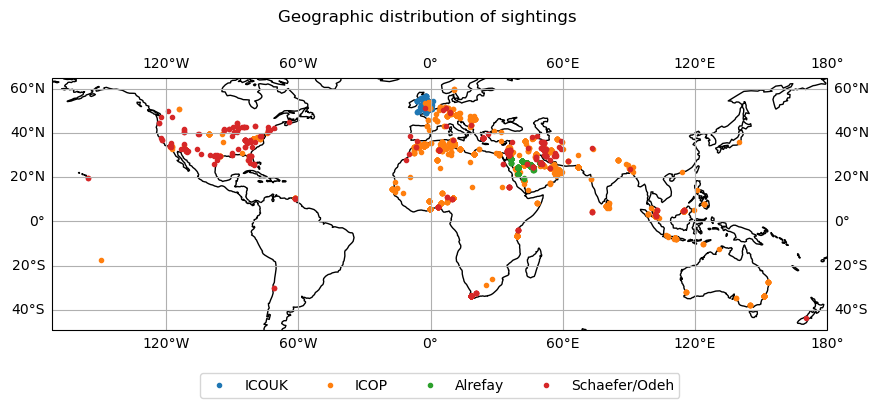

In [3]:
x = data["Longitude"]
y= data["Latitude"]
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111,projection=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

for source, name in zip(sources,source_names):
    x = source["Longitude"]
    y = source["Latitude"]
    ax.plot(x,y,".",label=name)

fig.suptitle("Geographic distribution of sightings")
fig.legend(loc="lower center",ncol=4)
plt.show()

## Visibility

In [4]:
def plot_pie_distribution(column, title,labels=[]):

    fig = plt.figure(figsize=(14,3))

    pies = data[column].value_counts(sort=False)
    if len(labels) == 0:
        labels = data[column].unique()
    ax1 = fig.add_subplot(1,5,1)
    ax1.pie(pies, labels=labels, autopct='%1.0f%%')
    ax1.set_title("All sources")
    ax1.set_xlabel(f"N={data.shape[0]}")

    for i, source in enumerate(sources):
        pies = source[column].value_counts(sort=False)
        labels = source[column].unique()
        ax = fig.add_subplot(1,5,i+2)
        ax.pie(pies,labels=labels,autopct='%1.0f%%')
        ax.set_title(source_names[i])
        ax.set_xlabel(f"N={source.shape[0]}")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

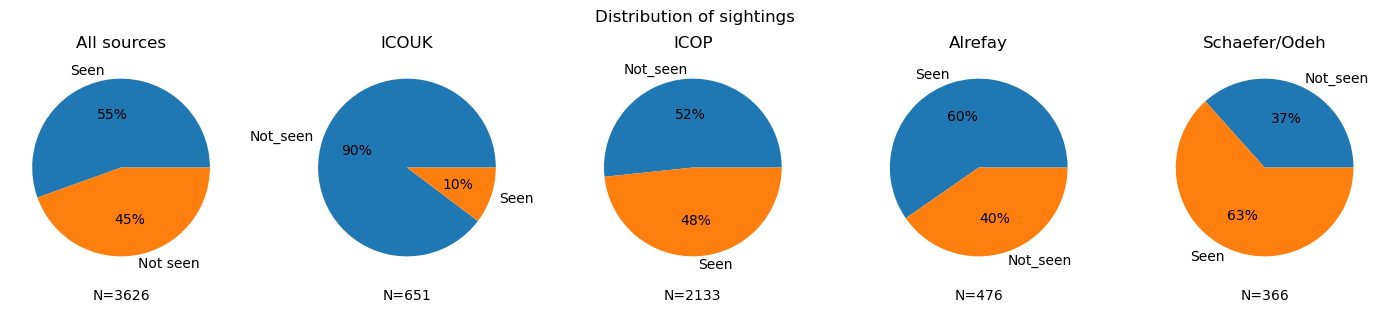

In [5]:
seen_labels=["Seen", "Not seen"]
plot_pie_distribution("Seen", "Distribution of sightings",seen_labels)

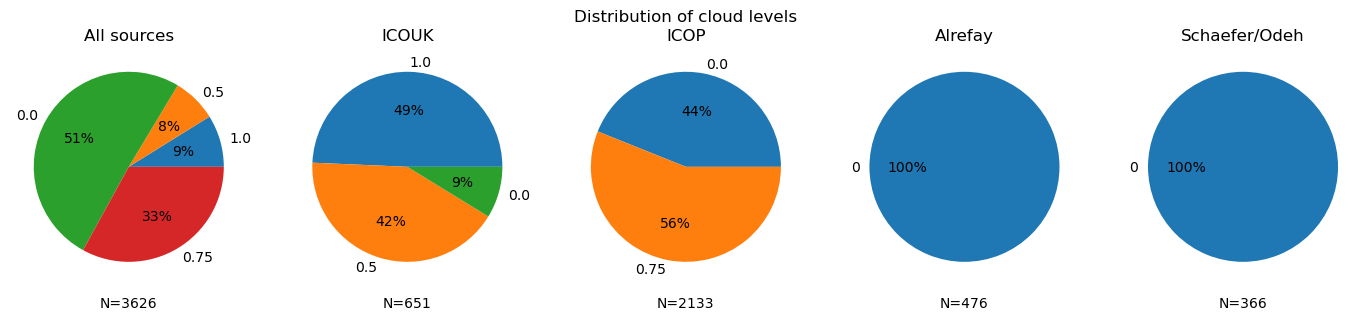

In [6]:
plot_pie_distribution("Cloud Level", "Distribution of cloud levels")

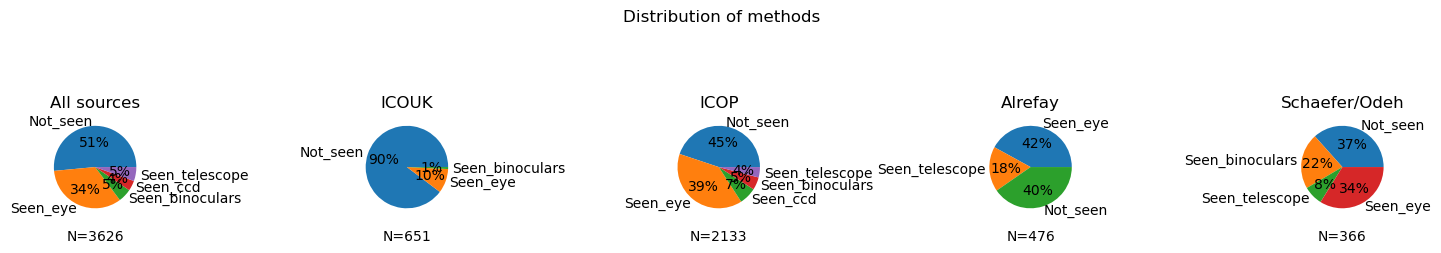

In [7]:
plot_pie_distribution("Method", "Distribution of methods")

/raid/scratch/npower/miniconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


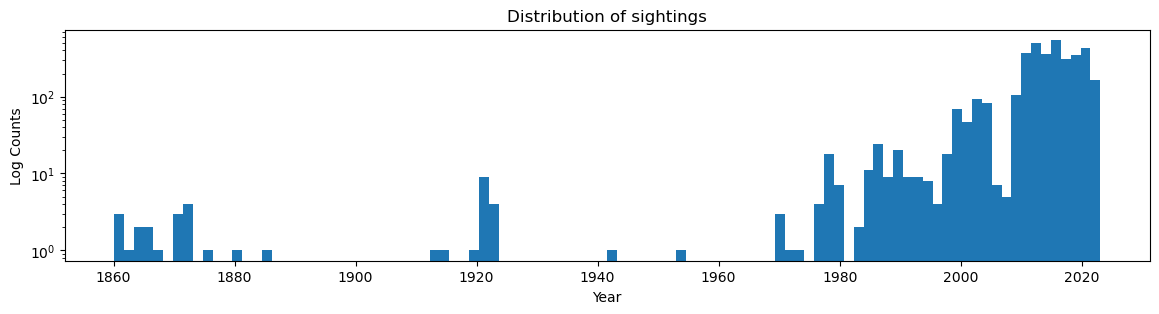

In [8]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

ax.hist(dates_list,log=True,bins=100)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
plt.show()

<Figure size 640x480 with 0 Axes>

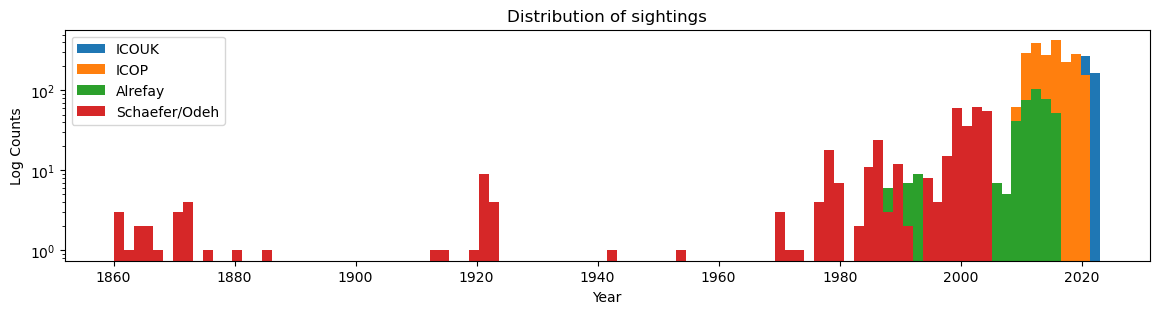

In [9]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]
#print(dates_list[1].timestamp())

(n, bins, patches) = plt.hist(dates_list, bins=100)
plt.clf()

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name in zip(sources,source_names):
    dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in source["Date"]]
    ax.hist(dates_list,bins,log=True,label=name)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
ax.legend()
plt.show()

## Accuracy of Yallop

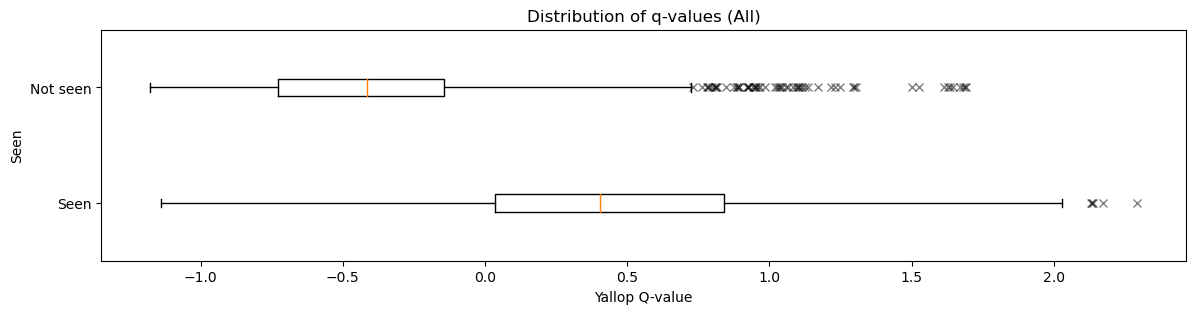

In [10]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (All)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

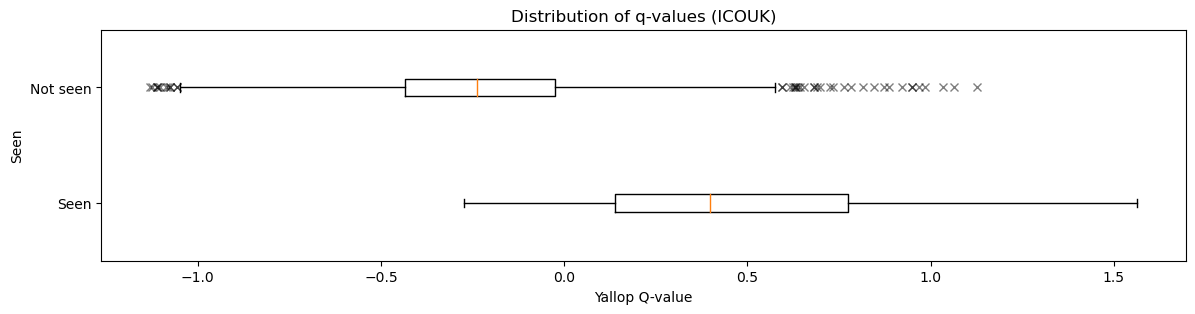

In [11]:
seen_q_values = icouk_data["q'"][icouk_data["Seen"]=="Seen"]
not_seen_q_values = icouk_data["q'"][icouk_data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (ICOUK)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

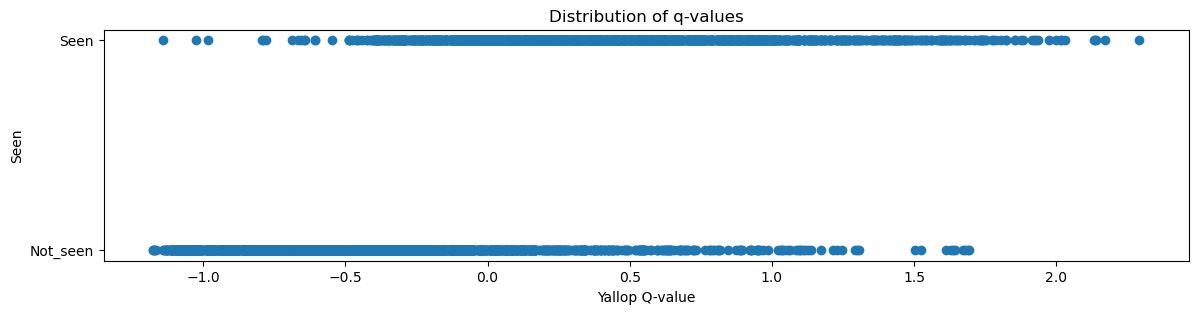

In [12]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.scatter(data["q'"],data["Seen"])

ax.set_title("Distribution of q-values")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
#ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

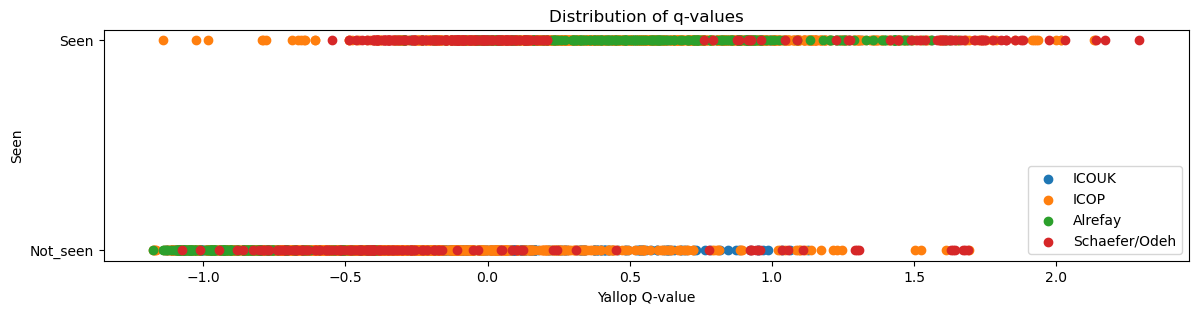

In [13]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name in zip(sources,source_names):
    ax.scatter(source["q'"],source["Seen"],label=name)

ax.set_title("Distribution of q-values")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.legend()
plt.show()

In [50]:
below_danjon_data = data[np.logical_and(data["Seen"]=="Seen",-0.293>=data["q'"])]
print(below_danjon_data.size)

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source['Seen']=='Seen', -0.293>=source["q'"])].size
    print(f"{name}: {no_below_danjon}")

interesting_data = allawi_data[np.logical_and(allawi_data["Seen"]=="Seen",-0.293>=allawi_data["q'"])]
interesting_data = interesting_data.drop(["Methods","Visibility","Source","Sunset","Moonset","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist"],axis=1)
interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()
interesting_data.head(10)

2640
ICOUK: 0
ICOP: 1380
Alrefay: 120
Schaefer/Odeh: 1140


,Unnamed: 0,Index,Date,Latitude,Longitude,Moon Age,Lag,Moon Alt,Moon Az,Sun Alt,Sun Az,ARCL,ARCV,DAZ,Parallax,W',q',Seen,Method
31,31,31,2004-10-14 17:11:02.400001,-33.9,18.4,0.716,35.65196,3.27960,259.55160,-3.22232,257.56994,6.79689,6.50192,-1.98166,58.67211,0.11245,-0.46333,Seen,Seen_binoculars
45,45,45,1999-12-08 15:10:37.631987,26.2,32.7,1.632,38.71771,3.72336,245.12263,-3.50811,246.36384,7.33707,7.23146,1.24121,53.81228,0.12017,-0.38563,Seen,Seen_telescope
52,52,52,1990-02-25 23:39:31.392019,35.6,-83.5,0.986,41.12470,3.84027,262.21296,-3.65899,261.66618,7.51914,7.49926,-0.54677,59.26917,0.13901,-0.34728,Seen,Seen_binoculars
54,54,54,2002-09-07 15:04:30.432007,32.5,51.3,0.628,36.85403,3.60542,276.28388,-3.42156,279.31047,7.65030,7.02698,3.02659,60.95970,0.14800,-0.38901,Seen,Seen_eye
59,59,59,2004-08-16 16:31:49.727991,32.0,35.9,0.689,37.84293,3.62040,285.05546,-3.41105,288.21422,7.70756,7.03145,3.15875,55.46774,0.13667,-0.39549,Seen,Seen_telescope
61,61,61,2004-03-21 15:03:30.815996,26.6,50.0,1.627,34.69382,3.58459,269.09641,-3.44434,272.32108,7.73248,7.02893,3.22467,56.11205,0.13915,-0.39423,Seen,Seen_binoculars
62,62,62,2001-08-19 15:27:45.792011,32.5,51.3,0.644,37.41282,3.54105,283.76774,-3.37187,287.26758,7.74741,6.91292,3.49984,61.24787,0.15249,-0.39767,Seen,Seen_eye
64,64,64,2001-12-15 13:39:24.191991,32.6,51.7,1.569,33.54317,2.70770,238.51958,-2.79412,243.98319,7.75230,5.50182,5.46362,56.43422,0.14063,-0.54603,Seen,Seen_eye
65,65,65,2004-03-21 15:11:51.071983,29.4,48.0,1.633,35.17529,3.52848,268.91976,-3.40211,272.53175,7.81432,6.93059,3.61199,56.11225,0.14211,-0.40225,Seen,Seen_telescope
67,67,67,1999-12-08 16:16:45.119982,36.8,10.4,1.678,44.06226,3.66266,240.81020,-3.47807,244.04385,7.83792,7.14073,3.23365,53.81667,0.13712,-0.38429,Seen,Seen_binoculars


In [52]:

morning_data = data[(data["Date"]-data["Date"].astype(int))>0.5]
evening_data = data[(data["Date"]-data["Date"].astype(int))<0.5]

print(f"Total: Morning: {morning_data.shape[0]} Evening: {evening_data.shape[0]}")

for source, name in zip(sources,source_names):
    smorning_data = source[(source["Date"]-source["Date"].astype(int))>0.5].shape[0]
    sevening_data = source[(source["Date"]-source["Date"].astype(int))<0.5].shape[0]
    print(f"{name}: Morning: {smorning_data} Evening: {sevening_data}")

amorning_data = allawi_data[(allawi_data["Date"]-allawi_data["Date"].astype(int))>0.5]

amorning_data["Date"] = Time(amorning_data["Date"],format="jd").to_datetime()
#morning_data.to_csv('morning_data.csv')
amorning_data = amorning_data.drop(["Index","Methods","Visibility","Sunset","Moonset","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist"],axis=1)
amorning_data.head(5)

Total: Morning: 451 Evening: 3175
ICOUK: Morning: 0 Evening: 651
ICOP: Morning: 362 Evening: 1771
Alrefay: Morning: 0 Evening: 476
Schaefer/Odeh: Morning: 89 Evening: 277


/raid/scratch/npower/miniconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 4 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/tmp/ipykernel_25434/2583990507.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amorning_data["Date"] = Time(amorning_data["Date"],format="jd").to_datetime()


,Unnamed: 0,Date,Latitude,Longitude,Moon Age,Lag,Moon Alt,Moon Az,Sun Alt,Sun Az,ARCL,ARCV,DAZ,Parallax,W',q',Seen,Method,Source
12,12,2004-04-21 02:31:02.496006,32.4,-111.0,2.105,84.38660,8.46482,285.50242,-7.57567,289.36029,16.49492,16.04049,3.85787,53.99453,0.60682,0.77933,Not_seen,Not_seen,SCHAEFER-ODEH
16,16,2004-09-16 01:48:40.608003,32.4,-110.8,2.075,54.16740,5.63744,262.34178,-5.06915,276.28600,17.56419,10.70660,13.94422,57.26534,0.72856,0.31268,Not_seen,Not_seen,SCHAEFER-ODEH
21,21,1989-06-05 05:34:41.951988,19.8,-155.5,2.232,89.87537,9.45894,295.70726,-8.45318,297.74253,18.02643,17.91212,2.03527,57.71884,0.77403,1.05776,Not_seen,Not_seen,SCHAEFER-ODEH
30,30,1988-04-18 00:58:22.655996,37.2,-84.1,2.041,110.70303,10.19497,288.55886,-9.33505,291.35070,19.72663,19.53002,2.79184,57.51788,0.92238,1.29820,Not_seen,Not_seen,SCHAEFER-ODEH
33,33,2003-10-27 01:28:56.928003,44.6,-123.1,2.062,52.79106,3.81841,236.64504,-4.02150,256.26189,21.11118,7.83991,19.61685,60.96566,1.11613,0.22894,Not_seen,Not_seen,SCHAEFER-ODEH


In [54]:

morning_data = data[data["Moon Age"]>20]
evening_data = data[data["Moon Age"]<=20]

print(f"Total: {data.shape[0]} Morning: {morning_data.shape[0]} Evening: {evening_data.shape[0]}")

for source, name in zip(sources,source_names):
    smorning_data = source[source["Moon Age"]>20].shape[0]
    sevening_data = source[source["Moon Age"]<=20].shape[0]
    print(f"{name}: Morning: {smorning_data} Evening: {sevening_data}")

amorning_data = allawi_data[(allawi_data["Date"]-allawi_data["Date"].astype(int))>0.5]

amorning_data["Date"] = Time(amorning_data["Date"],format="jd").to_datetime()
#morning_data.to_csv('morning_data.csv')
amorning_data = amorning_data.drop(["Index","Methods","Visibility","Sunset","Moonset","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist"],axis=1)
amorning_data.head(5)

Total: 3626 Morning: 8 Evening: 3618
ICOUK: Morning: 0 Evening: 651
ICOP: Morning: 5 Evening: 2128
Alrefay: Morning: 3 Evening: 473
Schaefer/Odeh: Morning: 0 Evening: 366


/raid/scratch/npower/miniconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 4 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/tmp/ipykernel_25434/3892984261.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amorning_data["Date"] = Time(amorning_data["Date"],format="jd").to_datetime()


,Unnamed: 0,Date,Latitude,Longitude,Moon Age,Lag,Moon Alt,Moon Az,Sun Alt,Sun Az,ARCL,ARCV,DAZ,Parallax,W',q',Seen,Method,Source
12,12,2004-04-21 02:31:02.496006,32.4,-111.0,2.105,84.38660,8.46482,285.50242,-7.57567,289.36029,16.49492,16.04049,3.85787,53.99453,0.60682,0.77933,Not_seen,Not_seen,SCHAEFER-ODEH
16,16,2004-09-16 01:48:40.608003,32.4,-110.8,2.075,54.16740,5.63744,262.34178,-5.06915,276.28600,17.56419,10.70660,13.94422,57.26534,0.72856,0.31268,Not_seen,Not_seen,SCHAEFER-ODEH
21,21,1989-06-05 05:34:41.951988,19.8,-155.5,2.232,89.87537,9.45894,295.70726,-8.45318,297.74253,18.02643,17.91212,2.03527,57.71884,0.77403,1.05776,Not_seen,Not_seen,SCHAEFER-ODEH
30,30,1988-04-18 00:58:22.655996,37.2,-84.1,2.041,110.70303,10.19497,288.55886,-9.33505,291.35070,19.72663,19.53002,2.79184,57.51788,0.92238,1.29820,Not_seen,Not_seen,SCHAEFER-ODEH
33,33,2003-10-27 01:28:56.928003,44.6,-123.1,2.062,52.79106,3.81841,236.64504,-4.02150,256.26189,21.11118,7.83991,19.61685,60.96566,1.11613,0.22894,Not_seen,Not_seen,SCHAEFER-ODEH


In [ ]:
dates = data["Date"] 
Time(interesting_data["Date"],format="jd").to_datetime()

In [15]:
q_values = data["q'"].astype("float")
quantified_q = np.empty((q_values.size),dtype=str)

quantified_q[q_values > 0.216] = "Seen" #A Easily visible
quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Not_seen" #D Will need optical aid to find crescent
quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
print(f"Yallop Accuracy (Seen/Not_seen): {accuracy_score(data['Seen'].str[0], quantified_q):.1%}")

Yallop Accuracy (Seen/Not_seen): 80.9%


In [16]:
q_values = data["q'"].astype("float")
quantified_q = np.empty((q_values.size),dtype=str)

quantified_q[q_values > 0.216] = "Seen" #A Easily visible
quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Not_seen" #D Will need optical aid to find crescent
quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
print(f"Yallop Accuracy (Seen/Not_seen): {accuracy_score(data['Seen'].str[0], quantified_q):.1%}")

Yallop Accuracy (Seen/Not_seen): 80.9%


In [17]:
q_values = data["q'"].astype("float")
quantified_q = np.empty((q_values.size),dtype=str)

data["Method"] = data["Method"].replace("Seen_binoculars", "Aid")
data["Method"] = data["Method"].replace("Seen_telescope", "Aid")
data["Method"] = data["Method"].replace("Seen_ccd", "Aid")

quantified_q[q_values > 0.216] = "Seen" #A Easily visible
quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Aid" #D Will need optical aid to find crescent
quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
print(f"Yallop Accuracy (Seen/With aid/Not_seen): {accuracy_score(data['Seen'].str[0], quantified_q):.1%}")

Yallop Accuracy (Seen/With aid/Not_seen): 77.2%
